In [1]:
try:
  import google.colab
  print("Setting Up Colab notebook")
  !pip install tensorflow==2.16.1 pennylane matplotlib -q
  print("Installed Packages")
  import os 
  if(not os.path.exists("../QML-Tutorials")):
    !git clone -b course https://github.com/MPSLab-ASU/QML-Tutorials.git
    %cd QML-Tutorials
  print("Fetched Data")
except ImportError:
  print("Not running in Google Colab")

Not running in Google Colab


In [2]:
import pennylane as qml
import matplotlib.pyplot as plt
import numpy as np
from utils.two_qubit import decompose_and_plot, draw_and_get_state
%matplotlib inline

# Entanglement 
As we studied, Entanglement creates unfactorizable state. 

In [39]:
dev = qml.device('default.qubit',wires=2)

## Creating Bell States
Lets look at the circuits to create the 4 bell states:

### State $\ket{\Phi^+}$
Recall,
$$
    \ket{\Phi^+} = \frac{1}{\sqrt{2}}(\ket{00}+\ket{11})
$$

In [42]:
@qml.qnode(dev)
def bell_phi_plus():
    qml.Hadamard(0)
    qml.CNOT([0,1])
    return qml.state()

In [43]:
bell_phi_plus()

tensor([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j], requires_grad=True)

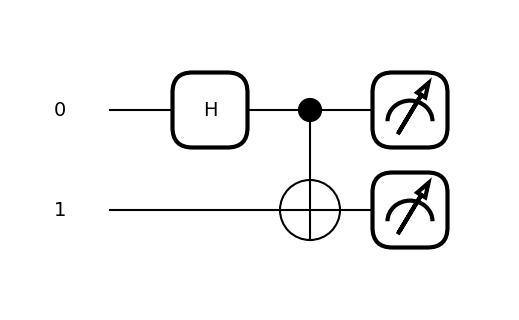

In [46]:
qml.draw_mpl(bell_phi_plus)()
plt.show()

### State $\ket{\Phi^-}$
Recall,
$$
    \ket{\Phi^-} = \frac{1}{\sqrt{2}}(\ket{00}-\ket{11})
$$

In [52]:
@qml.qnode(dev)
def bell_phi_minus():
    qml.X(0)
    qml.Hadamard(0)
    qml.CNOT([0,1])
    return qml.state()

In [53]:
bell_phi_minus()

tensor([ 0.70710678+0.j,  0.        +0.j,  0.        +0.j,
        -0.70710678+0.j], requires_grad=True)

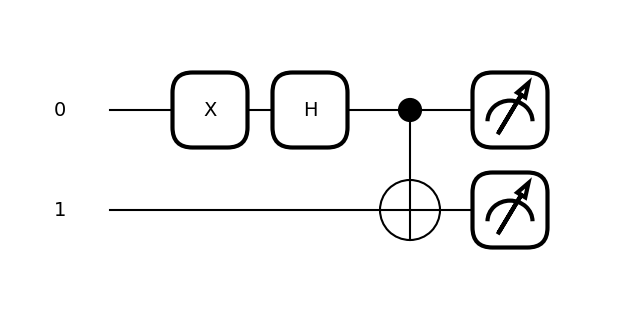

In [54]:
qml.draw_mpl(bell_phi_minus)()
plt.show()

### State $\ket{\Psi^+}$
Recall,
$$
    \ket{\Phi^-} = \frac{1}{\sqrt{2}}(\ket{01}+\ket{10})
$$

In [55]:
@qml.qnode(dev)
def bell_psi_plus():
    qml.Hadamard(0)
    qml.X(1)
    qml.CNOT([0,1])
    return qml.state()

In [56]:
bell_psi_plus()

tensor([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j, 0.        +0.j], requires_grad=True)

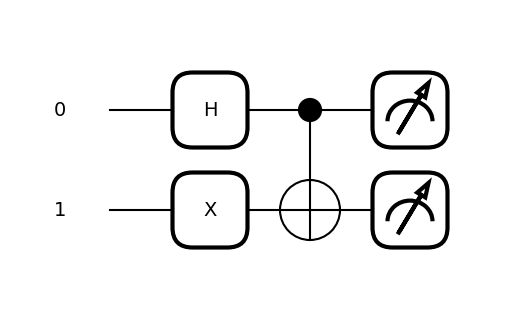

In [57]:
qml.draw_mpl(bell_psi_plus)()
plt.show()

### State $\ket{\Psi^-}$
Recall,
$$
    \ket{\Phi^-} = \frac{1}{\sqrt{2}}(\ket{01}-\ket{10})
$$

In [61]:
@qml.qnode(dev)
def bell_psi_minus():
    qml.X(0)
    qml.Hadamard(0)
    qml.X(1)
    qml.CNOT([0,1])
    return qml.state()

In [62]:
bell_psi_minus()

tensor([ 0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,
         0.        +0.j], requires_grad=True)

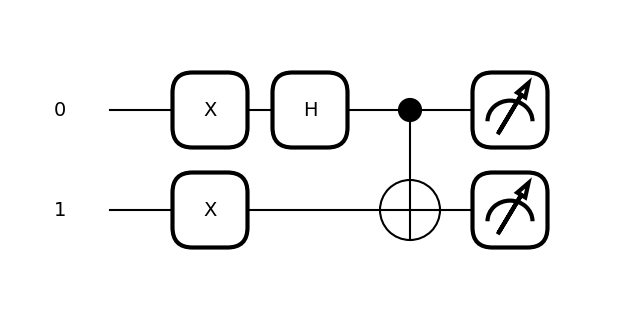

In [64]:
qml.draw_mpl(bell_psi_minus)()
plt.show()

# Ising Coupling

In [40]:
dev = qml.device('default.qubit',wires=2)

Helper function to create bell state

In [41]:
def bell_state_creator():
    qml.Hadamard(0)
    qml.CNOT([0,1])

## Maximal Entanglement 
The maximal entanglement value of the $YY(\theta)$ gate is found at $\theta = \pi/2$ 

**Recall** 
$$
YY(\theta) = \begin{pmatrix}
\cos(\theta) & 0 & 0 & i\sin(\theta) \\
0 & \cos(\theta) &  -i\sin(\theta) & 0 \\
0 & -i\sin(\theta) & \cos(\theta) & 0 \\
i\sin(\theta) & 0 & 0 & \cos(\theta)
\end{pmatrix}
$$

$\therefore$ at $\theta = \pi/2$ -
$$
YY(\pi/2) = \begin{pmatrix}
\frac{1}{\sqrt{2}} & 0 & 0 & \frac{i}{\sqrt{2}} \\
0 & \frac{1}{\sqrt{2}} &  \frac{-i}{\sqrt{2}} & 0 \\
0 & \frac{-i}{\sqrt{2}} & \frac{1}{\sqrt{2}} & 0 \\
\frac{i}{\sqrt{2}} & 0 & 0 & \frac{1}{\sqrt{2}}
\end{pmatrix}
$$

In [18]:
@qml.qnode(dev)
def YY_Test():
    qml.IsingYY(np.pi/2,[0,1])
    return qml.state()

In [17]:
YY_Test()

tensor([0.        +0.j        , 0.        -0.70710678j,
        0.70710678+0.j        , 0.        +0.j        ], requires_grad=True)

## Effect of Coupling on Probabilities

In [36]:
@qml.qnode(dev)
def coupler(YY:bool=False,theta=np.pi/2):
    bell_state_creator()
    if(YY):
        qml.IsingYY(theta,[0,1])
    return qml.state()

@qml.qnode(dev)
def coupler_probs(YY:bool=False,theta=np.pi/2):
    bell_state_creator()
    if(YY):
        qml.IsingYY(theta,[0,1])
    return qml.probs([0,1])

**Applying both circuits <u>without</u> YY-Coupling**

In [30]:
print("Probs: ",coupler_probs())
print("-"*25)
print("State: ",coupler())

Probs:  [0.5 0.  0.  0.5]
-------------------------
State:  [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


**Applying both circuits <u>with</u> YY-Coupling**

In [31]:
print("Probs: ",coupler_probs(True))
print("-"*25)
print("State: ",coupler(True))

Probs:  [0.5 0.  0.  0.5]
-------------------------
State:  [0.5+0.5j 0. +0.j  0. +0.j  0.5+0.5j]


**Applying both circuits <u>with</u> YY-Coupling and** $\theta = \frac{\pi}{4}$

In [32]:
print("Probs: ",coupler_probs(True,theta=np.pi/4))
print("-"*25)
print("State: ",coupler(True,theta=np.pi/4))

Probs:  [0.5 0.  0.  0.5]
-------------------------
State:  [0.65328148+0.27059805j 0.        +0.j         0.        +0.j
 0.65328148+0.27059805j]


**Applying both circuits <u>with</u> YY-Coupling and** $\theta=\pi$

In [34]:
print("Probs: ",coupler_probs(True,theta=np.pi))
print("-"*25)
print("State: ",coupler(True,theta=np.pi))

Probs:  [0.5 0.  0.  0.5]
-------------------------
State:  [4.32978028e-17+0.70710678j 0.00000000e+00+0.j
 0.00000000e+00+0.j         4.32978028e-17+0.70710678j]


### Conclusion
We can see that no matter the value of $\theta$ we see no change in the probabilities. This is empirical evidence of the YY coupling creating a global phase difference in our Bell State as clear by the fact that our state changes at every point. **However, if our input is not in the bell basis, the gate creates a relative phase difference which creates a difference in probabilities**.

*We can see this below*

In [37]:
@qml.qnode(dev)
def coupler_non_bell_probs(YY:bool=False,theta=np.pi/2):
    if(YY):
        qml.IsingYY(theta,[0,1])
    return qml.probs([0,1])

In [38]:
print("Probs without YY: ",coupler_non_bell_probs())
print("-"*25)
print("Probs with YY: ",coupler_non_bell_probs(True))

Probs without YY:  [1. 0. 0. 0.]
-------------------------
Probs with YY:  [0.5 0.  0.  0.5]
